In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_two import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
target = 'DIAG_AD'

In [3]:
df = pd.read_csv('../data/ml_df_clean_undersampled.csv').iloc[:,1:]#.drop(['NPIKSEV'],axis=1)
df = df[df['DIAG_AD'].notna()].reset_index(drop=True)   # keep the rows where DXCHANGE is not nan
df

,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT,DIAG_AD
0,0.0,0.0,1.165995,0.951092,1.014711,1.024676,0.932286,0.994847,4.0,0.0
1,0.0,0.0,1.349460,0.981135,1.012147,1.059810,1.023016,1.007354,3.0,0.0
2,1.0,0.0,1.198569,0.992445,0.931705,1.048031,0.974166,0.946150,3.0,0.0
3,0.0,0.0,1.412130,0.988066,1.009576,1.094598,0.984251,1.027408,3.0,0.0
4,0.0,0.0,1.412130,0.988066,1.009576,1.094598,0.984251,1.027408,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
125,0.0,1.0,1.225915,0.936449,0.988560,0.940072,0.980257,1.010360,2.0,1.0
126,0.0,0.0,1.251490,0.884541,0.948144,0.857512,0.889447,0.983771,6.0,1.0
127,0.0,1.0,1.120741,0.922141,0.989796,0.917704,0.884847,1.008002,4.0,1.0
128,0.0,0.0,1.105057,0.984714,0.995118,0.874736,0.970956,1.000477,6.0,1.0


In [4]:
df.columns

Index(['insomnia', 'OSA', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'NPIKTOT', 'DIAG_AD'],
      dtype='object')

In [5]:
col_lst = [ target,'insomnia', 'OSA', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'NPIKTOT']
df1 = df[ col_lst].dropna(how='any',axis=0).reset_index(drop = True)
df1

,DIAG_AD,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT
0,0.0,0.0,0.0,1.165995,0.951092,1.014711,1.024676,0.932286,0.994847,4.0
1,0.0,0.0,0.0,1.349460,0.981135,1.012147,1.059810,1.023016,1.007354,3.0
2,0.0,1.0,0.0,1.198569,0.992445,0.931705,1.048031,0.974166,0.946150,3.0
3,0.0,0.0,0.0,1.412130,0.988066,1.009576,1.094598,0.984251,1.027408,3.0
4,0.0,0.0,0.0,1.412130,0.988066,1.009576,1.094598,0.984251,1.027408,3.0
...,...,...,...,...,...,...,...,...,...,...
125,1.0,0.0,1.0,1.225915,0.936449,0.988560,0.940072,0.980257,1.010360,2.0
126,1.0,0.0,0.0,1.251490,0.884541,0.948144,0.857512,0.889447,0.983771,6.0
127,1.0,0.0,1.0,1.120741,0.922141,0.989796,0.917704,0.884847,1.008002,4.0
128,1.0,0.0,0.0,1.105057,0.984714,0.995118,0.874736,0.970956,1.000477,6.0


In [6]:
df1.groupby(target).count()

,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT
DIAG_AD,,,,,,,,,
0.0,65,65,65,65,65,65,65,65,65
1.0,65,65,65,65,65,65,65,65,65


In [7]:
df1.shape

(130, 10)

In [8]:
np.sum(df1.isna())   # check nan

DIAG_AD                 0
insomnia                0
OSA                     0
ratio_Ventricles_bl     0
ratio_Hippocampus_bl    0
ratio_WholeBrain_bl     0
ratio_Entorhinal_bl     0
ratio_Fusiform_bl       0
ratio_ICV_bl            0
NPIKTOT                 0
dtype: int64

Text(0, 0.5, 'count')

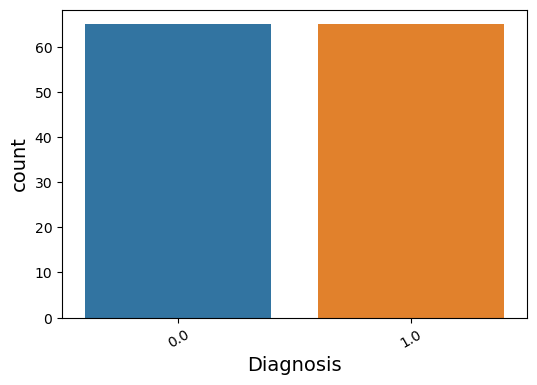

In [9]:
f, axes = plt.subplots(figsize=(6, 4))
sns.countplot(data=df1, x= target)
plt.tick_params(axis='x',labelrotation=30)
plt.xlabel('Diagnosis',fontsize=14)
plt.ylabel('count',fontsize=14)

In [10]:
drop_lst = [target]
k = 10

### is a patient with NL keep NL or not?

After undersampling data size is 130 ; Resampled dataset shape Counter({0.0: 65, 1.0: 65})

6 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

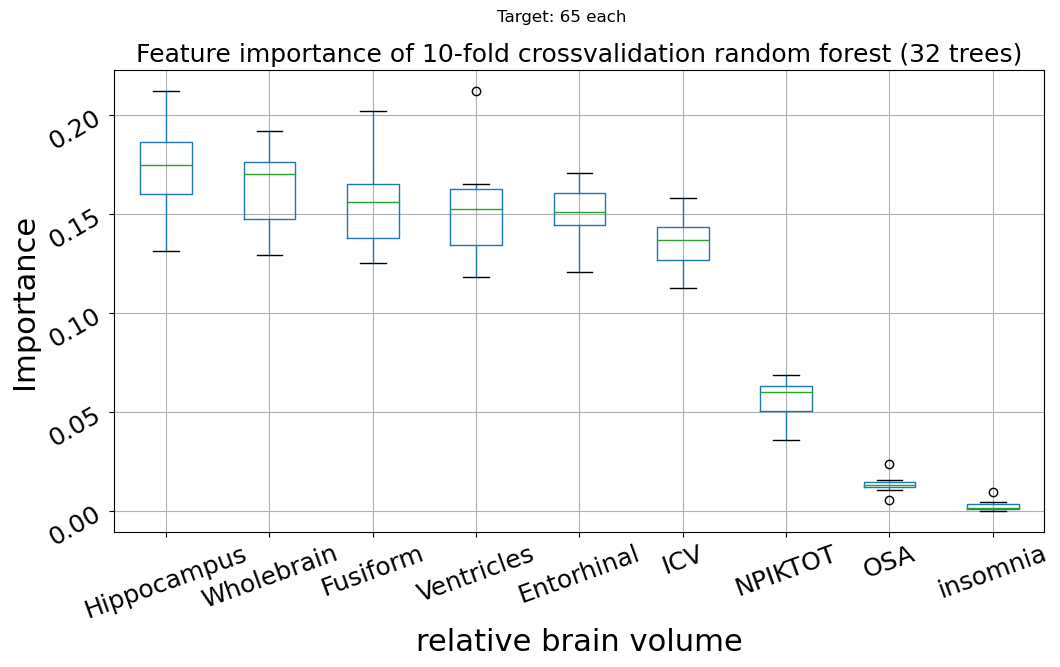

In [11]:
n = 32
k = 10
res = usampling_scale_data(df1,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 42)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: 65 each ')
plt.xlabel('relative brain volume',fontsize = 22)
plt.ylabel('Importance',fontsize = 22)
plt.xticks(fontsize=18, rotation=30)
plt.xticks([1, 2,3,4,5,6,7,8,9], ['Hippocampus', 'Wholebrain', 'Fusiform','Ventricles','Entorhinal','ICV','NPIKTOT','OSA','insomnia'],rotation=20) 
plt.yticks(fontsize=18, rotation=30)

